In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import jieba
import time

### 爬虫抓取html页面,提取评论
先人肉点点评论,看看每一页的url  
https://movie.douban.com/subject/3878007/comments?start=0&limit=20&sort=new_score&status=P  
https://movie.douban.com/subject/3878007/comments?start=20&limit=20&sort=new_score&status=P  
https://movie.douban.com/subject/3878007/comments?start=40&limit=20&sort=new_score&status=P  

爬的时候遇到了403问题.被反爬了.我们需要把爬虫伪装成浏览器. 每次爬完一个页面sleep 2秒,防止被网站反爬禁止掉.
F12可以查看自己的cookie.User-Agent.  
爬的时候又遇到一些坑,没有评论的页面也是可以访问的.

In [2]:
comments_counts = 0
current_url = "https://movie.douban.com/subject/3878007/comments?start=%d&limit=20&sort=new_score&status=P" % (comments_counts)
comments = []
headers = {
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
           ,'Connection': 'keep-alive'
           }
cookies = {'cookie':'你自己的cookie'}

effective = True
while effective:
    r=requests.get(current_url,headers=headers,cookies=cookies)
    print("processing",current_url)
    effective = False
    if r.status_code == 200:
        bs = BeautifulSoup(r.text,"html.parser")
        #print(bs.find_all("span",class_="short"))  
        for comment in bs.find_all("span",class_="short"):
            #print(comment.get_text())
            comments.append(comment.get_text())
            effective = True
    else:
        print(r.status_code,current_url)
        break
    print(effective)
    comments_counts += 20
    current_url = "https://movie.douban.com/subject/3878007/comments?start=%d&limit=20&sort=new_score&status=P" % (comments_counts)

    time.sleep(2)

processing https://movie.douban.com/subject/3878007/comments?start=0&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=20&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=40&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=60&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=80&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=100&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=120&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=140&limit=20&sort=new_score&status=P
True
processing https://movie.douban.com/subject/3878007/comments?start=160&limit=20&sort=new_score&status=P
True
processing https://movie.

#### 抓取结果存到文件中

In [3]:
#print(comments)
data = pd.DataFrame(comments)
print(data.shape)
csv_headers = ['comment'] 
data.to_csv('./海王影评.csv',header=csv_headers,encoding='utf-8')

(500, 1)


In [4]:
import jieba
seg_list = jieba.cut("“海底《阿凡达》，水下潘多拉”。\n亚特", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ThinkPad\AppData\Local\Temp\jieba.cache
Loading model cost 0.723 seconds.
Prefix dict has been built succesfully.


Default Mode: “/ 海底/ 《/ 阿凡/ 达/ 》/ ，/ 水下/ 潘多拉/ ”/ 。/ 
/ 亚特


###  去除标点符号,去除停止词
去除标点  https://github.com/fxsjy/jieba/issues/528  
停止词下载 https://github.com/goto456/stopwords

In [5]:
#https://github.com/goto456/stopwords
f = open("哈工大停用词表.txt",encoding='utf-8')
stopword_list = [line.strip() for line in f.readlines()]

In [6]:

new_comments = []
for comment in comments:
    new_comment = re.sub(r'[^\u4e00-\u9fa5]', '', comment)  #https://github.com/fxsjy/jieba/issues/528 
    #print(new_comment)
    new_comments.append(new_comment)

#word_list = [list(jieba.cut(''.join(new_comments),cut_all=False))]

word_list = [word for word in jieba.cut(''.join(new_comments),cut_all=False) if word not in stopword_list]
print(word_list)

['精美绝伦', '水下', '世界', '宏伟', '瑰丽', '海底', '奇观', '堪称', '海底', '阿凡', '达', '水下', '潘多拉', '亚特兰蒂斯', '史诗', '级', '战争', '气势磅礴', '媲美', '星球大战', '指环王', '动作', '戏', '登峰造极', '拳拳', '肉', '人', '再次', '感受', '钢铁', '之躯', '震撼', '飞船', '追逐', '更是', '眼花缭乱', '引人入胜', '仿佛', '速度', '激情', '搬到', '海底', '寻找', '三叉戟', '探险', '之旅', '同样', '其乐无穷', '妙趣横生', '夺宝奇兵', '再现', '影片', '核心', '回归', '家庭', '探索', '自我', '肯定', '承载', '成长', '母爱', '自信', '亲情', '最后', '镜头', '人', '热泪盈眶', '托马斯', '终于', '等到', '妻子', '重逢', '终于', '等到', '近几年', '最', '优秀', '电影', '温子仁', '卡梅隆', '彼得', '杰克逊', '附体', '拍', '一部', '动作', '冒险', '奇幻', '超英', '元素', '集大成者', '黑暗', '骑士', '之后', '最好', '超级', '英雄', '电影', '从此', '影史', '记住', '海王', '名字', '从造', '梦', '层面', '温子仁', '真的', '远超', '预期', '觉得', '算', '失手', '无话可说', '只能', '闭嘴', '这场', '梦', '始于', '失落', '亚特兰蒂斯', '按图索骥', '探索', '迷宫般', '牵引', '出', '整座', '深海', '帝国', '神秘', '版图', '看似', '闯关', '游戏', '式', '老套路', '其实', '西方', '古典', '神话', '模本', '类似', '亚瑟王', '寻找', '圣杯', '温子仁', '没有', '全然', '秉承', '暗黑', '风格', '那场', '海王', '亚瑟', '守护', '三叉戟', '海怪', '之间', '对话', '着实', '方式', 

In [7]:
#clean_word_list = [word for word in word_list if word not in stopword_list]

### 词云生成
wordcloud官方文档https://amueller.github.io/word_cloud/index.html  
https://blog.csdn.net/xiemanR/article/details/72796739 经过测试发现不支持显示中文的原因是因为wordcloud的默认字体不支持中文，那就好办了，我们设置一种支持中文的字体即可， wordlcloud.WordCloud类初始化函数有个设置字体的参数font_path，把支持中文的字体的路径传给font_path。

去C:\Windows\Fonts下找一个自己喜欢的中文字体.右键属性可以看到字体名称.

In [8]:
from scipy.misc import imread
back_coloring = imread('./海王.jpg')
print(type(back_coloring))

<class 'numpy.ndarray'>


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [9]:
# 官方文档https://amueller.github.io/word_cloud/
from wordcloud import WordCloud, ImageColorGenerator
from scipy.misc import imread
back_coloring = imread('./background.jpg')
print(type(back_coloring))
#wc = WordCloud(background_color="white", max_words=200, mask=back_coloring,max_font_size=100, random_state=42, width=1000, height=860, margin=2,)
font='C:\Windows\Fonts\simhei.ttf'
wc = WordCloud(background_color="white",font_path=font,mask=back_coloring,max_words=2000)
wc.generate(" ".join(word_list))#注意：传进来的word_list要用空格分隔

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


<class 'numpy.ndarray'>


#### 绘图
https://blog.csdn.net/xiemanR/article/details/72796739
经过测试发现不支持显示中文的原因是因为wordcloud的默认字体不支持中文，那就好办了，我们设置一种支持中文的字体即可， wordlcloud.WordCloud类初始化函数有个设置字体的参数font_path，把支持中文的字体的路径传给font_path。

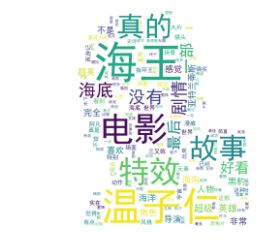

In [10]:
import matplotlib.pyplot as plt

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file('./海王_wordcloud.png')